In [1]:
from os import listdir
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
def read_img(path):
    '''
    giving the path of the directory and return the array of all images with labels
    '''
    x = []
    y = []
    file_0 = [path+"/0/"+f for f in listdir(path+"/0") if f != ".DS_Store"]
    file_1 = [path+"/1/"+f for f in listdir(path+"/1") if f != ".DS_Store"]
    for file in file_0:
        label = 0
        y.append(label)
        img = Image.open(file).convert('RGB').resize((224,224))
        data = np.array(img).reshape(-1,)
        x.append(data)
    for file in file_1:
        label = 1
        y.append(label)
        img = Image.open(file).convert('RGB').resize((224,224))
        data = np.array(img).reshape(-1,)
        x.append(data)
    return x, y

In [3]:
X_test, y_test = read_img('human/test')

In [4]:
len(X_test)

1536

In [5]:
X_test[0].shape

(150528,)

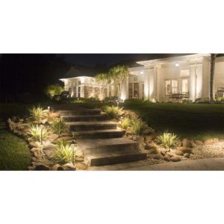

In [6]:
Image.fromarray(X_test[0].reshape(224,224,3))

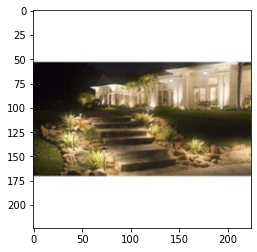

In [7]:
plt.imshow(X_test[0].reshape(224,224,3))

In [8]:
X_train, y_train = read_img('human/train')

In [9]:
len(X_train)

4352

In [10]:
X_train[-1].shape

(150528,)

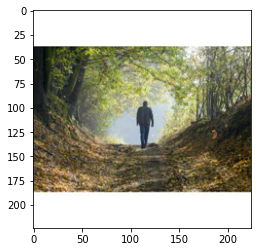

In [11]:
plt.imshow(X_train[-1].reshape(224,224,3))

In [12]:
X_val, y_val = read_img('human/val')

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


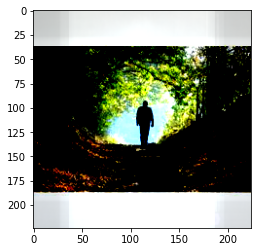

In [14]:
plt.imshow(X_train[-1].reshape(224,224,3))

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
rfc.score(X_train, y_train)

0.9997702205882353

In [17]:
rfc.score(X_val, y_val)

0.8053385416666666

In [18]:
rfc.score(X_test, y_test)

0.818359375